In [1]:
#Kaggle Titanic Dataset
#Questions we are addressing are:
#Which passenger class has the maximum number of survivors?
#What is the distribution, based on gender, of the survivors among the different classes?
#What is the distribution of the nonsurvivors among classes that have relatives aboard the ship?
#What is the survival percentage among different age groups?

In [2]:
import numpy as np
import pandas as pd
import pylab as plt

data = pd.read_csv("titanic.csv")
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Total Survivors = since it is given in 1/0 hencee it needs to be summed upp
survivors = data.groupby('Pclass')['Survived'].agg(sum)
survivors.head()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [4]:
#Total Passengers = we need to count the passengers only
total_passengers = data.groupby('Pclass')['PassengerId'].count()
total_passengers.head()

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

In [5]:
survivors_percentage = survivors/total_passengers
print(survivors_percentage)

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64


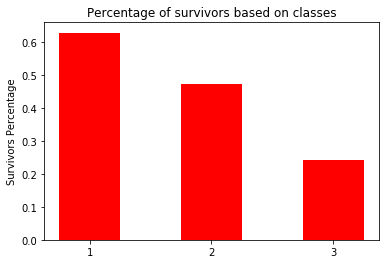

In [6]:
fig = plt.figure()
ax = fig.add_subplot()
rect = ax.bar(survivors_percentage.index.values.tolist(),survivors_percentage,color='red',width=0.5)
ax.set_ylabel('Survivors Percentage')
ax.set_title('Percentage of survivors based on classes')
ax.set_xticks(survivors_percentage.index.values.tolist())
plt.show()


#Observations
#Most number of survivors are from 1st and 2nd class only
#1st class has max number of survivors and 3rd class has minimum number of survivors
#Takeaways: Clearly a prefernce was shown to the people of first class to save them from drowning

In [7]:
#Passengers survived on the basis of gender
male_survived = data[data['Sex'] == 'male'].groupby('Pclass')['Survived'].agg(sum)
male_total = data[data['Sex'] == 'male'].groupby('Pclass')['PassengerId'].count()
male_survivor_percentage = male_survived/male_total
female_survived = data[data['Sex']=='female'].groupby('Pclass')['Survived'].agg(sum)
female_total = data[data['Sex']=='female'].groupby('Pclass')['PassengerId'].count()
female_survivor_percentage = female_survived/female_total
print(male_survivor_percentage)
print(female_survivor_percentage)

#Females got lucky!!

Pclass
1    0.368852
2    0.157407
3    0.135447
dtype: float64
Pclass
1    0.968085
2    0.921053
3    0.500000
dtype: float64


In [8]:
#non - survivors 

non_survivors = data[(data['SibSp']>0)|(data['Parch']>0)&(data['Survived']==0)].groupby('Pclass')['PassengerId'].count()
print(non_survivors)
total_passengers = data.groupby('Pclass')['PassengerId'].count()
non_survivors_percentage = non_survivors/total_passengers
print(non_survivors_percentage)

Pclass
1     88
2     66
3    153
Name: PassengerId, dtype: int64
Pclass
1    0.407407
2    0.358696
3    0.311609
Name: PassengerId, dtype: float64


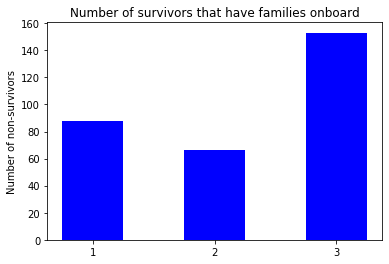

In [9]:
#Number of survivors that have families onboard per class
fig = plt.figure()
ax = fig.add_subplot()
rect = ax.bar(non_survivors.index.values.tolist(),non_survivors,color = 'blue', width = 0.5)
ax.set_ylabel('Number of non-survivors')
ax.set_title('Number of survivors that have families onboard')
ax.set_xticks(non_survivors.index.values.tolist())
plt.show()